# Resource usage (real data)
Using Slurm and pyseff, we can get the runtime and memory usage of each tool.



In [7]:
import os
os.chdir('/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/')
from bench import *
from bench.utils.functions import *
from bench.utils.pyseff import *
import polars as pl
pl.Config(tbl_rows=65)

base_dir = "/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/results/real_data/subsamples/fraction_0.001/" # just need one to get the configs
threads = 12
tools_versions = pl.read_csv("tool_configs/tool_versions.csv")
tool_configs = load_tool_configs(base_dir)
tool_names = list(tool_configs.keys())
tool_names

['blastn',
 'bowtie1',
 'bowtie2',
 'indelfree_bruteforce',
 'indelfree_indexed',
 'lexicmap',
 'minimap2',
 'mmseqs2',
 'mummer4',
 'sassy',
 'strobealign',
 'x_mapper']

In [8]:
sacct_df = pyseff(remove_cancelled=False,remove_failed=False,calculate_cpu_efficiency=False,calculate_memory_efficiency=False)
sacct_df= sacct_df.with_columns(pl.col("JobName").str.replace_all("_long","").str.replace_all("mmseqs","mmseqs2"))
sacct_df = sacct_df.filter(~pl.col("JobName").str.contains_any(["damn","biofaster"])).filter(pl.col("JobName").str.contains_any(tool_names))
sacct_df

BaseJobID,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""19675897""","""minimap2""",16,"[""COMPLETED""]","[""0:0""]","""802448K""","""168G""",312,0,783.640625,172032.0,"""00:05:12""","""00:00:00"""
"""19675911""","""mummer4""",16,"[""COMPLETED""]","[""0:0""]","""300300K""","""168G""",103,0,293.261719,172032.0,"""00:01:43""","""00:00:00"""
"""19675793""","""sassy""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""19675909""","""minimap2""",16,"[""COMPLETED""]","[""0:0""]","""876268K""","""168G""",771,0,855.730469,172032.0,"""00:12:51""","""00:00:00"""
"""19675795""","""x_mapper""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""20541477""","""bowtie1""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""19675765""","""lexicmap""",0,"[""CANCELLED by 91591""]","[""0:0""]",null,"""168G""",0,0,null,172032.0,"""00:00:00""","""00:00:00"""
"""19675917""","""bowtie2""",16,"[""COMPLETED""]","[""0:0""]","""1309000K""","""168G""",159,0,1278.320312,172032.0,"""00:02:39""","""00:00:00"""
"""19675937""","""strobealign""",16,"[""COMPLETED""]","[""0:0""]","""8751032K""","""168G""",153,0,8545.929688,172032.0,"""00:02:33""","""00:00:00"""


Get all jobids that are actually needed

In [9]:
import glob
# fraction_dirs = glob.glob(os.path.join("results/real_data/subsamples/fraction_*"))
log_files = glob.glob("results/real_data/subsamples/fraction_*/slurm_logs/*.out")
# next - into a df with jobid, fraction, and tool name
log_files_df = pl.DataFrame({
    "log_file": log_files
}).with_columns(
    pl.col("log_file").str.extract(r"-(\d+)\.out").alias("BaseJobID"),
    pl.col("log_file").str.extract(r"fraction_(0\.\d+)").alias("fraction"),
    pl.col("log_file").str.extract(r"slurm_logs/(.+)-\d+\.out").str.replace_all("_long","").str.replace_all("mmseqs","mmseqs2").alias("tool_name")
)
log_files_df = log_files_df.join(sacct_df, on="BaseJobID", how="inner")
log_files_df
# sacct_df.filter(~pl.col("JobName").is_in(log_files_df["tool_name"]))
# log_files_df.filter(~pl.col("tool_name").is_in(sacct_df["JobName"]))

log_file,BaseJobID,fraction,tool_name,JobName,AllocCPUS,State,ExitCode,MaxRSS,ReqMem,Elapsed_Seconds,TotalCPU_Seconds,MaxRSS_MB,ReqMem_MB,Elapsed,TotalCPU
str,str,str,str,str,i64,list[str],list[str],str,str,u32,u32,f64,f64,str,str
"""results/real_data/subsamples/fraction_0.05/slurm_logs/strobealign-19675937.out""","""19675937""","""0.05""","""strobealign""","""strobealign""",16,"[""COMPLETED""]","[""0:0""]","""8751032K""","""168G""",153,0,8545.929688,172032.0,"""00:02:33""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.01/slurm_logs/indelfree_bruteforce_long-19865712.out""","""19865712""","""0.01""","""indelfree_bruteforce""","""indelfree_bruteforce""",16,"[""COMPLETED""]","[""0:0""]","""91335032K""","""168G""",1755919,9258926,89194.367188,172032.0,"""20-07:45:19""","""107-03:55:26"""
"""results/real_data/subsamples/fraction_0.005/slurm_logs/blastn-19675903.out""","""19675903""","""0.005""","""blastn""","""blastn""",16,"[""COMPLETED""]","[""0:0""]","""452228K""","""168G""",29721,157512,441.628906,172032.0,"""08:15:21""","""1-19:45:12"""
"""results/real_data/subsamples/fraction_0.01/slurm_logs/bowtie2-19675917.out""","""19675917""","""0.01""","""bowtie2""","""bowtie2""",16,"[""COMPLETED""]","[""0:0""]","""1309000K""","""168G""",159,0,1278.320312,172032.0,"""00:02:39""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.005/slurm_logs/minimap2-19675909.out""","""19675909""","""0.005""","""minimap2""","""minimap2""",16,"[""COMPLETED""]","[""0:0""]","""876268K""","""168G""",771,0,855.730469,172032.0,"""00:12:51""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.005/slurm_logs/mummer4-19675911.out""","""19675911""","""0.005""","""mummer4""","""mummer4""",16,"[""COMPLETED""]","[""0:0""]","""300300K""","""168G""",103,0,293.261719,172032.0,"""00:01:43""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.001/slurm_logs/minimap2-19675897.out""","""19675897""","""0.001""","""minimap2""","""minimap2""",16,"[""COMPLETED""]","[""0:0""]","""802448K""","""168G""",312,0,783.640625,172032.0,"""00:05:12""","""00:00:00"""
"""results/real_data/subsamples/fraction_0.1/slurm_logs/indelfree_bruteforce_long-19865715.out""","""19865715""","""0.1""","""indelfree_bruteforce""","""indelfree_bruteforce""",16,"[""TIMEOUT"", ""CANCELLED"", ""COMPLETED""]","[""0:0"", ""0:15""]","""91373332K""","""168G""",1814403,9614258,89231.769531,172032.0,"""21-00:00:03""","""111-06:37:38"""
"""results/real_data/subsamples/fraction_0.001/slurm_logs/bowtie1-19675892.out""","""19675892""","""0.001""","""bowtie1""","""bowtie1""",16,"[""COMPLETED""]","[""0:0""]","""641672K""","""168G""",175,0,626.632812,172032.0,"""00:02:55""","""00:00:00"""


In [24]:
# Get contig counts and total sizes for each fraction
fraction_dirs = glob.glob("results/real_data/subsamples/fraction_*")
contig_counts = []

for fdir in sorted(fraction_dirs):
    fraction = fdir.split("fraction_")[-1]
    metadata_file = os.path.join(fdir, "subsampled_data/subsampled_metadata.tsv")
    
    if os.path.exists(metadata_file):
        # Read metadata to get counts and sizes
        metadata_df = pl.read_csv(metadata_file, separator='\t')
        num_contigs = len(metadata_df)
        total_size_bp = metadata_df["length"].sum()
        
        contig_counts.append({
            "fraction": fraction,
            "fraction_float": float(fraction),
            "num_contigs": num_contigs,
            "total_size_bp": total_size_bp,
            "total_size_Mbp": total_size_bp / 1_000_000
        })

contig_counts_df = pl.DataFrame(contig_counts).sort("fraction_float")
print("Contig counts and sizes by fraction:")
print(contig_counts_df)

Contig counts and sizes by fraction:
shape: (5, 5)
┌──────────┬────────────────┬─────────────┬───────────────┬────────────────┐
│ fraction ┆ fraction_float ┆ num_contigs ┆ total_size_bp ┆ total_size_Mbp │
│ ---      ┆ ---            ┆ ---         ┆ ---           ┆ ---            │
│ str      ┆ f64            ┆ i64         ┆ i64           ┆ f64            │
╞══════════╪════════════════╪═════════════╪═══════════════╪════════════════╡
│ 0.001    ┆ 0.001          ┆ 808         ┆ 19092031      ┆ 19.092031      │
│ 0.005    ┆ 0.005          ┆ 1907        ┆ 51437394      ┆ 51.437394      │
│ 0.01     ┆ 0.01           ┆ 3815        ┆ 109058481     ┆ 109.058481     │
│ 0.05     ┆ 0.05           ┆ 19079       ┆ 572384853     ┆ 572.384853     │
│ 0.1      ┆ 0.1            ┆ 38158       ┆ 1201630299    ┆ 1201.630299    │
└──────────┴────────────────┴─────────────┴───────────────┴────────────────┘


In [ ]:
# Get spacer counts and total size (same for all fractions)
spacer_file = "imgvr4_data/spacers/All_CRISPR_spacers_nr_clean_name_length.tab"
spacer_df = pl.read_csv(spacer_file, separator='\t', has_header=False, new_columns=["name", "length"])
num_spacers = len(spacer_df)
total_spacer_bp = spacer_df["length"].sum()
total_spacer_Mbp = total_spacer_bp / 1_000_000

print("Spacer dataset (constant across all fractions):")
print(f"  Number of spacers: {num_spacers:,}")
print(f"  Total length: {total_spacer_bp:,} bp ({total_spacer_Mbp:.2f} Mbp)")

Spacer dataset (constant across all fractions):
  Number of spacers: 3,882,812
  Total length: 131,437,147 bp (131.44 Mbp)


In [10]:
# Check the relationship between Elapsed and TotalCPU to understand the metrics
# Elapsed_Seconds should be wall-clock time, TotalCPU_Seconds is actual CPU time used
sample_check = log_files_df.select([
    "tool_name", "fraction", "AllocCPUS", "Elapsed_Seconds", "TotalCPU_Seconds"
]).head(20)

print("Sample of timing data:")
print(sample_check)

# Check if we have TotalCPU data
if "TotalCPU_Seconds" in log_files_df.columns:
    print("\n✓ TotalCPU_Seconds is available - this is the actual CPU time used")
    print("✓ Elapsed_Seconds is wall-clock time")
else:
    print("\n⚠ Only Elapsed_Seconds available")

# Check CPU allocation variations
cpu_check = log_files_df.with_columns([
    pl.col("log_file").str.contains("_long").alias("is_long")
]).group_by(["tool_name", "is_long"]).agg([
    pl.col("AllocCPUS").unique().alias("CPU_values"),
    pl.len().alias("count")
]).sort("tool_name")

print("\nCPU allocation by tool and retry status:")
print(cpu_check)

Sample of timing data:
shape: (20, 5)
┌──────────────────────┬──────────┬───────────┬─────────────────┬──────────────────┐
│ tool_name            ┆ fraction ┆ AllocCPUS ┆ Elapsed_Seconds ┆ TotalCPU_Seconds │
│ ---                  ┆ ---      ┆ ---       ┆ ---             ┆ ---              │
│ str                  ┆ str      ┆ i64       ┆ u32             ┆ u32              │
╞══════════════════════╪══════════╪═══════════╪═════════════════╪══════════════════╡
│ strobealign          ┆ 0.05     ┆ 16        ┆ 153             ┆ 0                │
│ indelfree_bruteforce ┆ 0.01     ┆ 16        ┆ 1755919         ┆ 9258926          │
│ blastn               ┆ 0.005    ┆ 16        ┆ 29721           ┆ 157512           │
│ bowtie2              ┆ 0.01     ┆ 16        ┆ 159             ┆ 0                │
│ minimap2             ┆ 0.005    ┆ 16        ┆ 771             ┆ 0                │
│ mummer4              ┆ 0.005    ┆ 16        ┆ 103             ┆ 0                │
│ minimap2             ┆ 0.

# Process jobs accounting for retries and fraction sizes

Key considerations:
- Multiple fraction sizes tested (0.001, 0.01, 0.1, etc.)
- Some jobs timed out and were resubmitted with "_long" suffix (may have different QOS/CPU allocation)
- For each tool-fraction combination, prefer completed jobs (prioritize _long if both exist)
- Track CPU allocations as they may differ between regular and _long jobs
- Report TIMEOUT only if all attempts failed for that tool-fraction

In [18]:
# Process log_files_df to handle regular and _long jobs
# First, identify which jobs are regular vs _long retries
log_files_df = log_files_df.with_columns([
    pl.col("log_file").str.contains("_long").alias("is_long_retry"),
    pl.col("tool_name").alias("base_tool_name"),  # already has _long stripped
    pl.col("fraction").cast(pl.Float64).alias("fraction_float")  # for sorting/plotting
])

# Check job states - categorize them
log_files_df = log_files_df.with_columns([
    pl.col("State").list.get(0).alias("state_first"),  # Get first state from list
])

# Mark jobs to exclude (OOM, CANCELLED, PREEMPTED) and timeout
exclude_states = ['OUT_OF_MEMORY', 'CANCELLED', 'PREEMPTED']
log_files_df = log_files_df.with_columns([
    pl.col("state_first").is_in(exclude_states).alias("should_exclude"),
    pl.col("state_first").str.contains("TIMEOUT").fill_null(False).alias("is_timeout"),
    pl.col("state_first").str.contains("COMPLETED").fill_null(False).alias("is_completed"),
    pl.col("state_first").str.contains("FAILED").fill_null(False).alias("is_failed"),
])

# For each (tool, fraction) pair, select the best job
# Priority: _long completed > regular completed > mark failed/timeout
job_selection = log_files_df.group_by(["base_tool_name", "fraction"]).agg([
    pl.all(),
])

def select_best_job(group_df):
    """Select the best job from regular/_long pair for each tool-fraction combination"""
    results = []
    
    for row in group_df.iter_rows(named=True):
        tool = row["base_tool_name"]
        fraction = row["fraction"]
        
        # Get all jobs for this tool-fraction pair
        is_long = row["is_long_retry"]
        should_exclude = row["should_exclude"]
        is_completed = row["is_completed"]
        is_timeout = row["is_timeout"]
        is_failed = row["is_failed"]
        jobids = row["BaseJobID"]
        elapsed = row["Elapsed_Seconds"]
        total_cpu = row.get("TotalCPU_Seconds", elapsed)  # fallback to elapsed if no TotalCPU
        maxrss = row["MaxRSS_MB"]
        reqmem = row["ReqMem_MB"]
        alloccpus = row["AllocCPUS"]
        
        # Filter out excluded jobs (OOM, CANCELLED, PREEMPTED)
        valid_indices = [i for i, excl in enumerate(should_exclude) if not excl]
        
        if not valid_indices:
            continue  # All jobs excluded, skip
        
        # Separate regular and long jobs
        regular_idx = [i for i in valid_indices if not is_long[i]]
        long_idx = [i for i in valid_indices if is_long[i]]
        
        # Selection priority:
        # 1. _long completed
        # 2. regular completed  
        # 3. Mark as FAILED/TIMEOUT if all attempts failed
        
        selected_idx = None
        status = None
        replaced_failed_job = False
        
        # Check _long jobs first
        if long_idx:
            long_i = long_idx[0]
            if is_completed[long_i]:
                selected_idx = long_i
                status = "COMPLETED"
                # Check if this replaced a failed regular job
                if regular_idx and (is_timeout[regular_idx[0]] or is_failed[regular_idx[0]]):
                    replaced_failed_job = True
            elif is_timeout[long_i] or is_failed[long_i]:
                # _long also failed
                selected_idx = long_i
                status = "FAILED" if is_failed[long_i] else "TIMEOUT"
        
        # If no _long or _long didn't work, try regular
        if selected_idx is None and regular_idx:
            reg_i = regular_idx[0]
            if is_completed[reg_i]:
                selected_idx = reg_i
                status = "COMPLETED"
            elif is_timeout[reg_i] or is_failed[reg_i]:
                if not long_idx:  # Only report failure if no _long exists
                    selected_idx = reg_i
                    status = "FAILED" if is_failed[reg_i] else "TIMEOUT"
        
        if selected_idx is not None:
            # Use TotalCPU_Seconds if available and non-zero, otherwise Elapsed_Seconds
            # For very fast jobs, Slurm reports TotalCPU as 0, so we need to use wall time
            cpu_time_raw = total_cpu[selected_idx] if isinstance(total_cpu, list) else elapsed[selected_idx]
            elapsed_time = elapsed[selected_idx]
            
            # If TotalCPU is 0 or very small (< 1 second), use Elapsed instead
            # This handles fast jobs where Slurm doesn't capture CPU time accurately
            if cpu_time_raw < 1:
                cpu_time = elapsed_time
            else:
                cpu_time = cpu_time_raw
            
            results.append({
                "tool": tool,
                "fraction": fraction,
                "fraction_float": float(fraction),
                "BaseJobID": jobids[selected_idx],
                "status": status,
                "is_long_retry": is_long[selected_idx],
                "replaced_failed_job": replaced_failed_job,
                "Elapsed_Seconds": elapsed_time,
                "CPU_Time_Seconds": cpu_time,
                "MaxRSS_MB": maxrss[selected_idx],
                "ReqMem_MB": reqmem[selected_idx],
                "AllocCPUS": alloccpus[selected_idx],
                "Peak_Memory_Gb": maxrss[selected_idx] / 1024 if maxrss[selected_idx] else None,
                "CPU_Time_Hours": cpu_time / 3600,
                "Walltime_Hours": elapsed_time / 3600,
            })
    
    return pl.DataFrame(results) if results else pl.DataFrame()

# Apply selection
processed_jobs = select_best_job(job_selection)
processed_jobs = processed_jobs.sort(["tool", "fraction_float"])

print(f"Total jobs processed: {len(processed_jobs)}")
print(f"Unique tools: {processed_jobs['tool'].n_unique()}")
print(f"Unique fractions: {sorted(processed_jobs['fraction'].unique().to_list())}")
print(f"\nJobs using _long retry: {processed_jobs['is_long_retry'].sum()}")
print(f"Jobs that replaced failed attempts: {processed_jobs['replaced_failed_job'].sum()}")

processed_jobs

Total jobs processed: 60
Unique tools: 12
Unique fractions: ['0.001', '0.005', '0.01', '0.05', '0.1']

Jobs using _long retry: 6
Jobs that replaced failed attempts: 2


tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64
"""blastn""","""0.001""",0.001,"""19675891""","""COMPLETED""",false,false,11227,59388,248.203125,172032.0,16,0.242386,16.496667,3.118611
"""blastn""","""0.005""",0.005,"""19675903""","""COMPLETED""",false,false,29721,157512,441.628906,172032.0,16,0.431278,43.753333,8.255833
"""blastn""","""0.01""",0.01,"""19675915""","""COMPLETED""",false,false,62820,332944,570.496094,172032.0,16,0.557125,92.484444,17.45
"""blastn""","""0.05""",0.05,"""19675927""","""COMPLETED""",false,false,330558,1699468,477.105469,172032.0,16,0.465923,472.074444,91.821667
"""blastn""","""0.1""",0.1,"""19675939""","""COMPLETED""",false,false,657426,3391704,1713.492188,172032.0,16,1.673332,942.14,182.618333
"""bowtie1""","""0.001""",0.001,"""19675892""","""COMPLETED""",false,false,175,175,626.632812,172032.0,16,0.611946,0.048611,0.048611
"""bowtie1""","""0.005""",0.005,"""19675904""","""COMPLETED""",false,false,234,234,714.503906,172032.0,16,0.697758,0.065,0.065
"""bowtie1""","""0.01""",0.01,"""19675916""","""COMPLETED""",false,false,348,348,904.808594,172032.0,16,0.883602,0.096667,0.096667
"""bowtie1""","""0.05""",0.05,"""19675928""","""COMPLETED""",false,false,1023,1023,2613.808594,172032.0,16,2.552547,0.284167,0.284167


In [19]:
# Filter to only completed jobs for main analysis
completed_jobs = processed_jobs.filter(pl.col("status") == "COMPLETED")

# Show summary of job statuses
status_summary = processed_jobs.group_by(["tool", "status"]).agg([
    pl.len().alias("count")
]).sort(["tool", "status"])

print("Job Status Summary:")
print(status_summary)
print(f"\nTotal completed jobs: {len(completed_jobs)}")
print(f"Total jobs with issues: {len(processed_jobs) - len(completed_jobs)}")

completed_jobs

Job Status Summary:
shape: (14, 3)
┌──────────────────────┬───────────┬───────┐
│ tool                 ┆ status    ┆ count │
│ ---                  ┆ ---       ┆ ---   │
│ str                  ┆ str       ┆ u64   │
╞══════════════════════╪═══════════╪═══════╡
│ blastn               ┆ COMPLETED ┆ 5     │
│ bowtie1              ┆ COMPLETED ┆ 5     │
│ bowtie2              ┆ COMPLETED ┆ 5     │
│ indelfree_bruteforce ┆ COMPLETED ┆ 3     │
│ indelfree_bruteforce ┆ TIMEOUT   ┆ 2     │
│ indelfree_indexed    ┆ COMPLETED ┆ 5     │
│ lexicmap             ┆ FAILED    ┆ 5     │
│ minimap2             ┆ COMPLETED ┆ 5     │
│ mmseqs2              ┆ COMPLETED ┆ 5     │
│ mummer4              ┆ COMPLETED ┆ 5     │
│ sassy                ┆ COMPLETED ┆ 4     │
│ sassy                ┆ TIMEOUT   ┆ 1     │
│ strobealign          ┆ COMPLETED ┆ 5     │
│ x_mapper             ┆ COMPLETED ┆ 5     │
└──────────────────────┴───────────┴───────┘

Total completed jobs: 52
Total jobs with issues: 8


tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64
"""blastn""","""0.001""",0.001,"""19675891""","""COMPLETED""",false,false,11227,59388,248.203125,172032.0,16,0.242386,16.496667,3.118611
"""blastn""","""0.005""",0.005,"""19675903""","""COMPLETED""",false,false,29721,157512,441.628906,172032.0,16,0.431278,43.753333,8.255833
"""blastn""","""0.01""",0.01,"""19675915""","""COMPLETED""",false,false,62820,332944,570.496094,172032.0,16,0.557125,92.484444,17.45
"""blastn""","""0.05""",0.05,"""19675927""","""COMPLETED""",false,false,330558,1699468,477.105469,172032.0,16,0.465923,472.074444,91.821667
"""blastn""","""0.1""",0.1,"""19675939""","""COMPLETED""",false,false,657426,3391704,1713.492188,172032.0,16,1.673332,942.14,182.618333
"""bowtie1""","""0.001""",0.001,"""19675892""","""COMPLETED""",false,false,175,175,626.632812,172032.0,16,0.611946,0.048611,0.048611
"""bowtie1""","""0.005""",0.005,"""19675904""","""COMPLETED""",false,false,234,234,714.503906,172032.0,16,0.697758,0.065,0.065
"""bowtie1""","""0.01""",0.01,"""19675916""","""COMPLETED""",false,false,348,348,904.808594,172032.0,16,0.883602,0.096667,0.096667
"""bowtie1""","""0.05""",0.05,"""19675928""","""COMPLETED""",false,false,1023,1023,2613.808594,172032.0,16,2.552547,0.284167,0.284167


In [13]:
# Summary statistics by tool across all fractions
# Using Total CPU Time (TotalCPU) which already accounts for CPU allocation
tool_summary = completed_jobs.group_by("tool").agg([
    pl.col("CPU_Time_Hours").mean().alias("Avg_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").min().alias("Min_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").max().alias("Max_CPU_Time_Hours"),
    pl.col("CPU_Time_Hours").sum().alias("Total_CPU_Time_Hours"),
    pl.col("Peak_Memory_Gb").mean().alias("Avg_Peak_Memory_Gb"),
    pl.col("Peak_Memory_Gb").max().alias("Max_Peak_Memory_Gb"),
    pl.col("AllocCPUS").unique().alias("CPU_Allocations_Used"),
    pl.col("is_long_retry").sum().alias("Num_Long_Retries"),
    pl.col("replaced_failed_job").sum().alias("Num_Replaced_Failures"),
    pl.len().alias("Num_Fractions")
]).sort("Avg_CPU_Time_Hours")

# Add note about varying CPU allocations
tool_summary = tool_summary.with_columns([
    (pl.col("CPU_Allocations_Used").list.len() > 1).alias("Variable_CPUs")
])


print("TOOL PERFORMANCE SUMMARY (Across All Fractions)")
print("Note: CPU Time is total CPU time (from Slurm TotalCPU) - already accounts for # of CPUs used")

print(tool_summary)


# Show which tools had varying CPU allocations
varying_cpus = tool_summary.filter(pl.col("Variable_CPUs"))
if len(varying_cpus) > 0:
    print("\nTools with varying CPU allocations (likely due to _long retries):")
    for row in varying_cpus.iter_rows(named=True):
        print(f"  {row['tool']}: CPUs = {row['CPU_Allocations_Used']}")

tool_summary

TOOL PERFORMANCE SUMMARY (Across All Fractions)
Note: CPU Time is total CPU time (from Slurm TotalCPU) - already accounts for # of CPUs used
shape: (11, 12)
┌──────────────────────┬────────────────────┬────────────────────┬────────────────────┬──────────────────────┬────────────────────┬────────────────────┬──────────────────────┬──────────────────┬───────────────────────┬───────────────┬───────────────┐
│ tool                 ┆ Avg_CPU_Time_Hours ┆ Min_CPU_Time_Hours ┆ Max_CPU_Time_Hours ┆ Total_CPU_Time_Hours ┆ Avg_Peak_Memory_Gb ┆ Max_Peak_Memory_Gb ┆ CPU_Allocations_Used ┆ Num_Long_Retries ┆ Num_Replaced_Failures ┆ Num_Fractions ┆ Variable_CPUs │
│ ---                  ┆ ---                ┆ ---                ┆ ---                ┆ ---                  ┆ ---                ┆ ---                ┆ ---                  ┆ ---              ┆ ---                   ┆ ---           ┆ ---           │
│ str                  ┆ f64                ┆ f64                ┆ f64                ┆ f6

tool,Avg_CPU_Time_Hours,Min_CPU_Time_Hours,Max_CPU_Time_Hours,Total_CPU_Time_Hours,Avg_Peak_Memory_Gb,Max_Peak_Memory_Gb,CPU_Allocations_Used,Num_Long_Retries,Num_Replaced_Failures,Num_Fractions,Variable_CPUs
str,f64,f64,f64,f64,f64,f64,list[i64],u64,u64,u64,bool
"""mmseqs2""",0.0,0.0,0.0,0.0,13.199899,20.251175,[16],0,0,5,false
"""strobealign""",0.0,0.0,0.0,0.0,5.136336,13.29546,[16],0,0,5,false
"""x_mapper""",0.0,0.0,0.0,0.0,7.017783,12.157669,[16],0,0,5,false
"""bowtie2""",0.404444,0.0,2.022222,2.022222,2.642422,6.950474,[16],0,0,5,false
"""mummer4""",0.472667,0.0,2.363333,2.363333,0.525883,1.185394,[16],0,0,5,false
"""bowtie1""",0.509667,0.0,2.548333,2.548333,1.968665,5.097469,[16],0,0,5,false
"""minimap2""",8.180778,0.0,26.284444,40.903889,4.069385,11.532059,[16],0,0,5,false
"""blastn""",313.389778,16.496667,942.14,1566.948889,0.674009,1.673332,[16],0,0,5,false
"""indelfree_indexed""",391.224444,19.817778,1195.666667,1956.122222,81.524413,89.569225,[16],1,1,5,false


In [14]:
# Show all non-completed jobs
failed_jobs = processed_jobs.filter(pl.col("status") != "COMPLETED").sort(["tool", "fraction"])

if len(failed_jobs) > 0:
    
    print(f"FAILED/TIMEOUT JOBS: {len(failed_jobs)} total")
    
    
    # Convert elapsed seconds to hours for readability
    failed_jobs_display = failed_jobs.with_columns([
        (pl.col("Elapsed_Seconds") / 3600).round(2).alias("Time_Hours")
    ]).select([
        "tool", "fraction", "status", "Time_Hours", "AllocCPUS", "BaseJobID"
    ])
    
    print(failed_jobs_display)
    
    
    # Summary by tool
    failure_summary = failed_jobs.group_by(["tool"]).agg([
        pl.len().alias("num_failures")
    ]).sort("num_failures", descending=True)
    
    print("\nFailure Summary by Tool:")
    print(failure_summary)
else:
    print("\n✓ All jobs completed successfully!")

failed_jobs

FAILED/TIMEOUT JOBS: 8 total
shape: (8, 6)
┌──────────────────────┬──────────┬─────────┬────────────┬───────────┬───────────┐
│ tool                 ┆ fraction ┆ status  ┆ Time_Hours ┆ AllocCPUS ┆ BaseJobID │
│ ---                  ┆ ---      ┆ ---     ┆ ---        ┆ ---       ┆ ---       │
│ str                  ┆ str      ┆ str     ┆ f64        ┆ i64       ┆ str       │
╞══════════════════════╪══════════╪═════════╪════════════╪═══════════╪═══════════╡
│ indelfree_bruteforce ┆ 0.05     ┆ TIMEOUT ┆ 504.0      ┆ 16        ┆ 19865713  │
│ indelfree_bruteforce ┆ 0.1      ┆ TIMEOUT ┆ 504.0      ┆ 16        ┆ 19865715  │
│ lexicmap             ┆ 0.001    ┆ FAILED  ┆ 0.01       ┆ 16        ┆ 19675896  │
│ lexicmap             ┆ 0.005    ┆ FAILED  ┆ 0.01       ┆ 16        ┆ 19675908  │
│ lexicmap             ┆ 0.01     ┆ FAILED  ┆ 0.01       ┆ 16        ┆ 19675920  │
│ lexicmap             ┆ 0.05     ┆ FAILED  ┆ 0.03       ┆ 16        ┆ 19675932  │
│ lexicmap             ┆ 0.1      ┆ FAILED  

tool,fraction,fraction_float,BaseJobID,status,is_long_retry,replaced_failed_job,Elapsed_Seconds,CPU_Time_Seconds,MaxRSS_MB,ReqMem_MB,AllocCPUS,Peak_Memory_Gb,CPU_Time_Hours,Walltime_Hours
str,str,f64,str,str,bool,bool,i64,i64,f64,f64,i64,f64,f64,f64
"""indelfree_bruteforce""","""0.05""",0.05,"""19865713""","""TIMEOUT""",true,false,1814402,9586168,89239.507812,172032.0,16,87.147957,2662.824444,504.000556
"""indelfree_bruteforce""","""0.1""",0.1,"""19865715""","""TIMEOUT""",true,false,1814403,9614258,89231.769531,172032.0,16,87.1404,2670.627222,504.000833
"""lexicmap""","""0.001""",0.001,"""19675896""","""FAILED""",false,false,33,0,3170.746094,172032.0,16,3.096432,0.0,0.009167
"""lexicmap""","""0.005""",0.005,"""19675908""","""FAILED""",false,false,42,0,3307.023438,172032.0,16,3.229515,0.0,0.011667
"""lexicmap""","""0.01""",0.01,"""19675920""","""FAILED""",false,false,46,0,3364.304688,172032.0,16,3.285454,0.0,0.012778
"""lexicmap""","""0.05""",0.05,"""19675932""","""FAILED""",false,false,124,0,7116.132812,172032.0,16,6.949348,0.0,0.034444
"""lexicmap""","""0.1""",0.1,"""19675944""","""FAILED""",false,false,229,0,9828.71875,172032.0,16,9.598358,0.0,0.063611
"""sassy""","""0.1""",0.1,"""19865717""","""TIMEOUT""",true,false,1814403,9327086,172019.011719,172032.0,16,167.987316,2590.857222,504.000833


# Failed/Timeout Jobs Report
List all jobs that timed out or failed

In [15]:
# Detailed performance table by tool and fraction
performance_by_fraction = completed_jobs.select([
    "tool", "fraction", "fraction_float", "AllocCPUS", 
    "CPU_Time_Hours", "Peak_Memory_Gb", 
    "is_long_retry", "replaced_failed_job"
]).sort(["tool", "fraction_float"])


print("DETAILED PERFORMANCE: CPU Time × Memory by Tool and Fraction")
print("Note: CPU Time = Total CPU time from Slurm (already accounts for # CPUs)")

print(performance_by_fraction)


# Create summary showing resource usage scaling with fraction size
scaling_summary = completed_jobs.group_by(["tool", "fraction"]).agg([
    pl.col("CPU_Time_Hours").first().alias("CPU_Time_Hrs"),
    pl.col("Peak_Memory_Gb").first().alias("Memory_GB"),
    pl.col("AllocCPUS").first().alias("CPUs"),
    pl.col("replaced_failed_job").first().alias("Replaced_Failed")
]).sort(["tool", "fraction"])

print("RESOURCE SCALING BY FRACTION SIZE")

print(scaling_summary)


# Show jobs that replaced failed attempts
replaced = completed_jobs.filter(pl.col("replaced_failed_job")).select([
    "tool", "fraction", "AllocCPUS", "is_long_retry"
])
if len(replaced) > 0:
    print(f"\n{len(replaced)} jobs successfully completed after initial failure:")
    print(replaced)

performance_by_fraction

DETAILED PERFORMANCE: CPU Time × Memory by Tool and Fraction
Note: CPU Time = Total CPU time from Slurm (already accounts for # CPUs)
shape: (52, 8)
┌──────────────────────┬──────────┬────────────────┬───────────┬────────────────┬────────────────┬───────────────┬─────────────────────┐
│ tool                 ┆ fraction ┆ fraction_float ┆ AllocCPUS ┆ CPU_Time_Hours ┆ Peak_Memory_Gb ┆ is_long_retry ┆ replaced_failed_job │
│ ---                  ┆ ---      ┆ ---            ┆ ---       ┆ ---            ┆ ---            ┆ ---           ┆ ---                 │
│ str                  ┆ str      ┆ f64            ┆ i64       ┆ f64            ┆ f64            ┆ bool          ┆ bool                │
╞══════════════════════╪══════════╪════════════════╪═══════════╪════════════════╪════════════════╪═══════════════╪═════════════════════╡
│ blastn               ┆ 0.001    ┆ 0.001          ┆ 16        ┆ 16.496667      ┆ 0.242386       ┆ false         ┆ false               │
│ blastn               ┆ 0.00

tool,fraction,fraction_float,AllocCPUS,CPU_Time_Hours,Peak_Memory_Gb,is_long_retry,replaced_failed_job
str,str,f64,i64,f64,f64,bool,bool
"""blastn""","""0.001""",0.001,16,16.496667,0.242386,false,false
"""blastn""","""0.005""",0.005,16,43.753333,0.431278,false,false
"""blastn""","""0.01""",0.01,16,92.484444,0.557125,false,false
"""blastn""","""0.05""",0.05,16,472.074444,0.465923,false,false
"""blastn""","""0.1""",0.1,16,942.14,1.673332,false,false
"""bowtie1""","""0.001""",0.001,16,0.0,0.611946,false,false
"""bowtie1""","""0.005""",0.005,16,0.0,0.697758,false,false
"""bowtie1""","""0.01""",0.01,16,0.0,0.883602,false,false
"""bowtie1""","""0.05""",0.05,16,0.0,2.552547,false,false


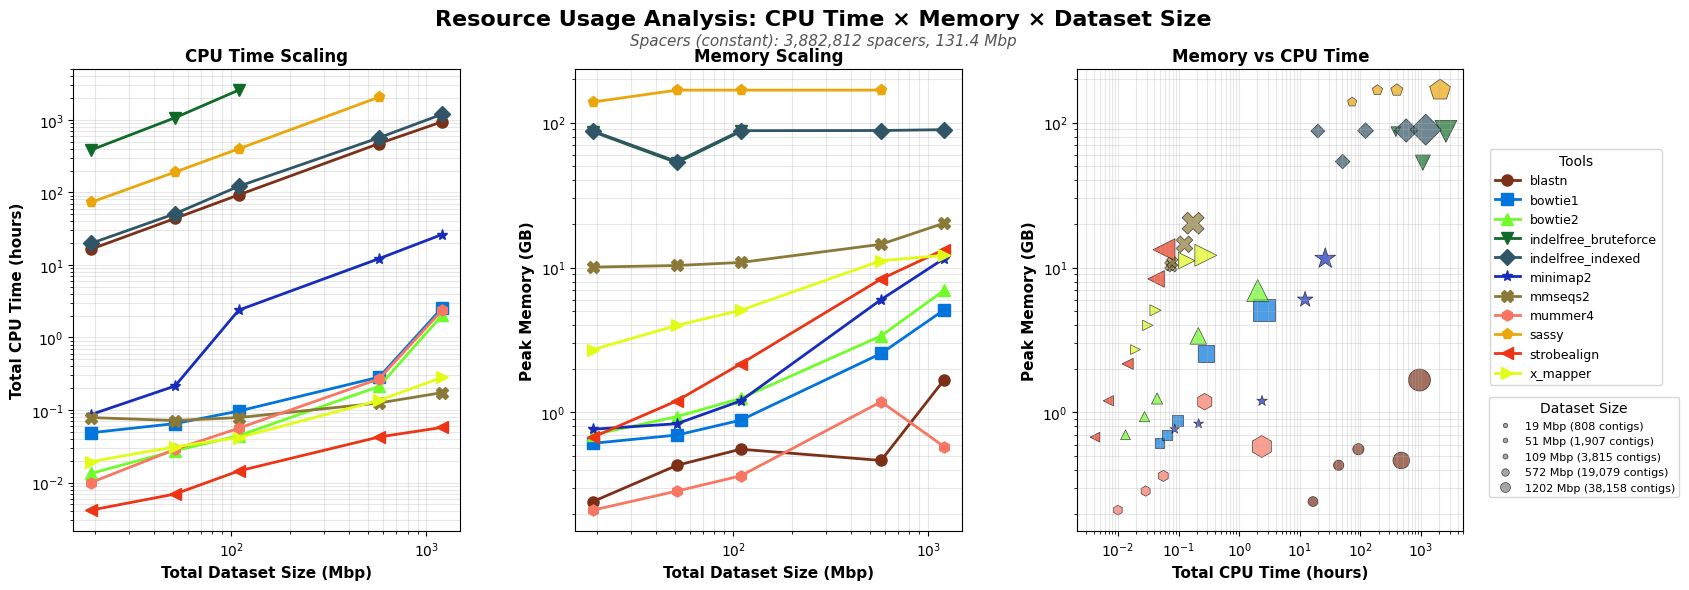

In [31]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json
import numpy as np

# Load tool styles 
with open("notebooks/tool_styles.json", "r") as f:
    tool_styles = json.load(f)

# Create 1 row x 3 columns layout with legend on the right
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3, hspace=0.3, wspace=0.3, right=0.82)

# Add title with spacer information
spacer_info_text = f'Spacers (constant): {num_spacers:,} spacers, {total_spacer_Mbp:.1f} Mbp'
fig.suptitle('Resource Usage Analysis: CPU Time × Memory × Dataset Size', 
             fontsize=16, fontweight='bold', y=0.98,)
fig.text(0.5, 0.92, spacer_info_text, ha='center', fontsize=11, style='italic', color='#555555')

tools_list = sorted(completed_jobs["tool"].unique().to_list())
fractions_list = sorted(completed_jobs["fraction_float"].unique().to_list())

# Merge contig counts with fractions for x-axis labeling
contig_info = {row['fraction_float']: (row['num_contigs'], row['total_size_Mbp']) 
               for row in contig_counts_df.iter_rows(named=True)}

# Plot 1: CPU Time vs Dataset Size
ax1 = fig.add_subplot(gs[0, 0])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool") == tool).sort("fraction_float")
    if len(tool_data) > 0:
        fractions = tool_data["fraction_float"].to_numpy()
        # Use total size in Mbp for x-axis
        sizes_mbp = [contig_info[f][1] for f in fractions]
        cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
        color = tool_styles.get(tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(tool, {}).get("marker", "o")
        ax1.plot(sizes_mbp, cpu_time, marker=marker, color=color, linewidth=2, markersize=8)

ax1.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax1.set_title('CPU Time Scaling', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, which='both')

# Plot 2: Memory vs Dataset Size
ax2 = fig.add_subplot(gs[0, 1])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool") == tool).sort("fraction_float")
    if len(tool_data) > 0:
        fractions = tool_data["fraction_float"].to_numpy()
        sizes_mbp = [contig_info[f][1] for f in fractions]
        memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
        if len(memory) > 0:
            color = tool_styles.get(tool, {}).get("color", "#1f77b4")
            marker = tool_styles.get(tool, {}).get("marker", "o")
            sizes_to_use = sizes_mbp[:len(memory)]
            ax2.plot(sizes_to_use, memory, marker=marker, color=color, linewidth=2, markersize=8)

ax2.set_xlabel('Total Dataset Size (Mbp)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax2.set_title('Memory Scaling', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, which='both')

# Plot 3: Memory vs CPU Time (colored by dataset size)
ax3 = fig.add_subplot(gs[0, 2])
for tool in tools_list:
    tool_data = completed_jobs.filter(pl.col("tool") == tool)
    cpu_time = tool_data["CPU_Time_Hours"].to_numpy()
    memory = tool_data["Peak_Memory_Gb"].drop_nulls().to_numpy()
    fraction = tool_data["fraction_float"].to_numpy()
    min_len = min(len(cpu_time), len(memory))
    if min_len > 0:
        color = tool_styles.get(tool, {}).get("color", "#1f77b4")
        marker = tool_styles.get(tool, {}).get("marker", "o")
        # Map dataset size to marker size
        sizes_mbp_vals = [contig_info[f][1] for f in fraction[:min_len]]
        min_size, max_size = min(sizes_mbp_vals), max(sizes_mbp_vals)
        marker_sizes = 50 + np.array([(s - min_size) / (max_size - min_size) * 200 for s in sizes_mbp_vals])
        ax3.scatter(cpu_time[:min_len], memory[:min_len], 
                   color=color, marker=marker, s=marker_sizes, alpha=0.7, 
                   edgecolors='black', linewidth=0.5)

ax3.set_xlabel('Total CPU Time (hours)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Peak Memory (GB)', fontsize=11, fontweight='bold')
ax3.set_title('Memory vs CPU Time', fontsize=12, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3, which='both')

# Create unified legend on the right
# Tool legend handles
tool_handles = []
for tool in tools_list:
    color = tool_styles.get(tool, {}).get("color", "#1f77b4")
    marker = tool_styles.get(tool, {}).get("marker", "o")
    tool_handles.append(Line2D([0], [0], marker=marker, color=color, linewidth=2, 
                               markersize=8, label=tool, linestyle='-'))

# Dataset size legend (show actual Mbp values)
size_handles = []
for frac in fractions_list:
    num_contigs, size_mbp = contig_info[frac]
    size_val = size_mbp
    min_mbp = contig_info[fractions_list[0]][1]
    max_mbp = contig_info[fractions_list[-1]][1]
    marker_size_calc = 50 + (size_val - min_mbp) / (max_mbp - min_mbp) * 200
    markersize = np.sqrt(marker_size_calc / 3.14) * 0.8
    size_handles.append(Line2D([0], [0], marker='o', color='gray', linewidth=0, 
                              markersize=markersize, label=f'{size_mbp:.0f} Mbp ({num_contigs:,} contigs)',
                              markerfacecolor='gray', markeredgecolor='black', 
                              markeredgewidth=0.5, alpha=0.7))

# Place legends on the right side
fig.legend(handles=tool_handles, title='Tools', loc='center left', 
           bbox_to_anchor=(0.83, 0.55), fontsize=9, title_fontsize=10, frameon=True)
fig.legend(handles=size_handles, title='Dataset Size', loc='center left',
           bbox_to_anchor=(0.83, 0.25), fontsize=8, title_fontsize=10, frameon=True)

plt.show()


### TODO: Remove timing in the above plot for TIMEDOUT
### TODO: match the shape size to the shapes in the legend

### NOTE ABOUT MEMORY:
The peak memory from Slurm doesn't mean that is the actual minimum memory required to run the job - the java tools (indelfree) will use what they can but only clear memory when needed (according to Brian).

In [32]:
# # Debug: Check which tools have data for which fraction sizes
# print("Tools and fraction sizes in completed_jobs:")
# tool_fraction_matrix = completed_jobs.group_by(["tool", "fraction"]).agg([
#     pl.len().alias("count")
# ]).sort(["tool", "fraction"])
# print(tool_fraction_matrix)

# # Pivot to see which combinations are missing
# pivot = completed_jobs.pivot(values="CPU_Time_Hours", index="tool", on="fraction")
# print("\nPivot view (showing which tool-fraction combinations exist):")
# print(pivot)